In [1]:
import torchvision, time, os, copy
import json
from torchvision import transforms
from torchvision import datasets
from torchvision import models
import torch
print('torch.__version__ : ', torch.__version__)
from torch import nn
from torch import optim
from torch.optim import lr_scheduler
import numpy as np
from matplotlib import pyplot as plt

torch.__version__ :  1.4.0a0+7f73f1d


In [2]:
#Ants=Bees
#quit()

# Data augmentation and normalization for training
# Just normalization for validation
#there isno testing 
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # ImageNet models were trained on 224x224 images
        transforms.RandomHorizontalFlip(), # flip horizontally 50% of the time - increases train set variability
        transforms.ToTensor(), # convert it to a PyTorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet models expect this norm
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
     'testing': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#=========
#Flowers
# TODO: Define your transforms for the training, validation, and testing sets
# how to split/separate the data; but this does the same to all,its not separating 
# its the same for all different models

data_transforms2 = {
    'training' : transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])]),
                                                            
    'validation' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])]),

    'testing' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
}



In [3]:
# Ants abd Bees, the classs is direct in directory
data_dir = 'hymenoptera_data'
# data_dir = 'hymenoptera_data'

#==============
# Flowers where pitures are in subdirectories

data_dir2 = 'flowers2'
train_dir2 = data_dir2 + '/train'
valid_dir2 = data_dir2 + '/valid'
test_dir2 = data_dir2 + '/test'

print(data_dir2)
print(train_dir2)
print(valid_dir2)
print(test_dir2)

# Get the num of classes from the directory
number_train_classes = len(os.listdir(train_dir2))
number_valid_classes = len(os.listdir(valid_dir2))
number_test_classes = len(os.listdir(test_dir2))

print(number_train_classes)
print(number_valid_classes)
print(number_test_classes)

if (number_train_classes != number_valid_classes) or (number_train_classes != number_test_classes) or (number_valid_classes != number_test_classes):
    print('Error: number of train, valid test classes is not the same')
    
number_classes = number_train_classes


flowers2
flowers2/train
flowers2/valid
flowers2/test
7
7
7


In [4]:
#Bees and Ants
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}

# Flowers

# TODO: Load the datasets with ImageFolder
image_datasets2 = {
    'training' : datasets.ImageFolder(train_dir2, transform=data_transforms2['training']),
    'testing' : datasets.ImageFolder(test_dir2, transform=data_transforms2['testing']),
    'validation' : datasets.ImageFolder(valid_dir2, transform=data_transforms2['validation'])
}

In [5]:
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}

#======FLOWERS
# TODO: Using the image datasets and the trainforms, define the dataloaders
# thats from above
dataloaders2 = {
    'training' : torch.utils.data.DataLoader(image_datasets2['training'], batch_size=64, shuffle=True),
    'testing' : torch.utils.data.DataLoader(image_datasets2['testing'], batch_size=64, shuffle=False),
    'validation' : torch.utils.data.DataLoader(image_datasets2['validation'], batch_size=64, shuffle=True)
}

In [6]:
#BeesAnts
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


In [7]:
#Flowers
image_datasets__class_to_idx = image_datasets2['training'].class_to_idx

In [8]:
#BeesAnts
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ('device', device)

device cuda:0


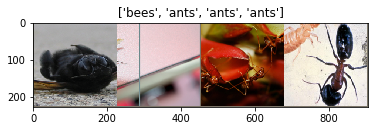

In [9]:
#AntsBees
# Helper function for displaying images
def imshow(inp, title=None):
    
#    import matplotlib as plt  # AttributeError: module 'matplotlib' has no attribute 'imshow'
    
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

#calls the funcion defined above
imshow(out, title=[class_names[x] for x in classes])

224
tensor([[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        ...,
        [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
        [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044]])


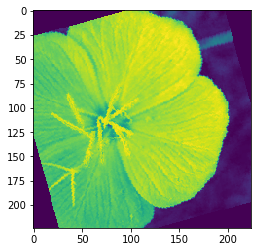

In [10]:
#Flowers
#Sample -- not in Template
# Helper function for displaying images
images, labels = next(iter(dataloaders2["training"]))
print(len(images[0,2]))
print((images[0,2]))
plt.imshow(images[0,0])
#plt.imshow(images[11,2])

In [11]:
#Flowers Json
#import json
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    print('cat_to_name: ', cat_to_name)

cat_to_name:  {'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orc

In [12]:
##should we have the labelling - json here ?
## seems thats the latest when its necessary
## Prepare the labels
#with open('hymenoptera_data/imagenet-simple-labels.json') as f:
##with open("imagenet-simple-labels.json") as f:
#    labels = json.load(f)

In [13]:
# should we have get modell here ?

In [14]:
# should we have build modell here?

In [15]:
#AntsBees
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    epoch_time = [] # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()
                
# UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. 
# In PyTorch 1.1.0 and later, you should call them in the opposite order: 
# `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will 
# result in PyTorch skipping the first value of the learning rate schedule. See more 
# details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
# "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        
        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time

#=========== fur flowers, das kommt eigentlich erst nach der definitiondes Modells

# Not in Template - kept separate

## Training

def train(model, epochs, learning_rate, criterion, optimizer, training_loader, validation_loader):
#    print('in training function')
    model.train()
    print_every = 40
    steps = 0
    use_gpu = True    
#    use_gpu = False
    if torch.cuda.is_available():
        use_gpu = True
        model.cuda()
    else:
        model.cpu()      
        
    for epoch in range(epochs):
#        print('epoch', epoch)
        running_loss = 0
    
        for inputs, labels in iter(training_loader):
            steps += 1
#        for inputs, labels in dataloaders[phase]:
#            inputs = inputs.to(device)
#            labels = labels.to(device)
# neu
            inputs = inputs.to(device)
            labels = labels.to(device)


##            if use_gpu:
##                inputs = Variable(inputs.float().cuda())
##                labels = Variable(labels.long().cuda()) 
##            else:
##                inputs = Variable(inputs)
##                labels = Variable(labels) 

#            with torch.set_grad_enabled(phase == 'train'):
#                outputs = model(inputs)
#                _, preds = torch.max(outputs, 1)
#                loss = criterion(outputs, labels)
#
#                # backward + optimize only if in training phase
#                if phase == 'train':
#                    loss.backward()
#                    optimizer.step()
                
            optimizer.zero_grad()
            output = model.forward(inputs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if 0 == 0: #steps % print_every == 0: 
#            if steps % print_every == 0: 

                # Validation Function is separate, called from here; this could be integrated but does it work for other functions?
                validation_loss, accuracy = validate(model, criterion, validation_loader)

                print("Epoch: {}/{} ".format(epoch+1, epochs),
                        "Training Loss: {:.3f} ".format(running_loss/print_every),
                        "Validation Loss: {:.3f} ".format(validation_loss),
                        "Validation Accuracy: {:.3f}".format(accuracy))

# Not in Template - kept separate, Function called from below

## Validation

def validate(model, criterion, data_loader):
    model.eval()
    accuracy = 0
    test_loss = 0
    
    with torch.no_grad(): # instead of volatile
    
        for inputs, labels in iter(data_loader):
# neu            
            inputs = inputs.to(device)
            labels = labels.to(device)            
            
##            if torch.cuda.is_available():
##                inputs = Variable(inputs.float().cuda())
##                labels = Variable(labels.long().cuda()) 
##            else:
##                inputs = Variable(inputs.float())
##                labels = Variable(labels.long()) 

            output = model.forward(inputs)
            test_loss += criterion(output, labels).item()
            ps = torch.exp(output).data 
            equality = (labels.data == ps.max(1)[1])
            accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss/len(data_loader), accuracy/len(data_loader)

In [16]:
# Hier wird beidesmal das  Model gebildet

# Ants+Bees
# there could be functions more at the begin
# def get_model():
# def build_model(hidden_layers, image_datasets__class_to_idx):

# Download a pre-trained ResNet18 model and freeze its weights
model = torch.hub.load('pytorch/vision:v0.5.0', 'resnet18', pretrained=True) 
#model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
# Optimizer
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

#Scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

#where are the hidden layers defined?



Using cache found in /home/klaus/.cache/torch/hub/pytorch_vision_v0.5.0


In [17]:
#==========
#Flowers
# TODO: Build and train your network

def get_model():
    model = torch.hub.load('pytorch/vision:v0.5.0', 'densenet161', pretrained=True) 
#    model = torch.hub.load('pytorch/vision:v0.5.0', 'densenet201', pretrained=True)
# look for Torch Version and settle torchvision version
#https://forums.developer.nvidia.com/t/pytorch-for-jetson-nano-version-1-5-0-now-available/72048
#Select the version of torchvision to download depending on the version of PyTorch that you have installed:
#PyTorch v1.0 - torchvision v0.2.2 
#PyTorch v1.1 - torchvision v0.3.0 
#PyTorch v1.2 - torchvision v0.4.0 
#PyTorch v1.3 - torchvision v0.4.2 
#PyTorch v1.4 - torchvision v0.5.0 
#PyTorch v1.5 - torchvision v0.6.0
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet169', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet201', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet161', pretrained=True)
#model.eval()
#print('pytorch_vision_v__ : ', pytorch_vision_v__)
#print('torchvision.__version__ : ', torchvision.__version__)
    
#    model = models.densenet201(pretrained=True)    
#    model = models.vgg16(pretrained=True)
#    model = models.densenet121(pretrained=True)
    return model


def build_model(hidden_layers, image_datasets__class_to_idx):
    model = get_model()
    for param in model.parameters():
        param.requires_grad = False    
    classifier_input_size = model.classifier.in_features
    print("Input size: ", classifier_input_size)
    output_size = 102
# are these all levels?
    from collections import OrderedDict
    classifier = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(classifier_input_size, hidden_layers)),
        ('relu', nn.ReLU()),
        ('fc2', nn.Linear(hidden_layers, output_size)),
        ('output', nn.LogSoftmax(dim=1))
    ]))    
    model.classifier = classifier
    model.class_to_idx = image_datasets__class_to_idx
    return model

# Not in Template - kept separate

#Parameterisation
hidden_layers = 512 #used for densenet 121, 
#hidden_layers = 0 # given for vgg16, not to be defined, but there are more than 0
model2 = build_model(hidden_layers, image_datasets__class_to_idx)


Using cache found in /home/klaus/.cache/torch/hub/pytorch_vision_v0.5.0


Input size:  2208


In [18]:
#Train Models - beider nacheinander, ggf ausfplitten
# Ants+Bees
# Function call to train model
model, epoch_time = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=20)
# model, epoch_time = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=4)


Epoch 1/20
----------


/home/klaus/.local/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.5377 Acc: 0.7131
val Loss: 0.3351 Acc: 0.8758

Epoch 2/20
----------
train Loss: 0.4524 Acc: 0.7910
val Loss: 0.2409 Acc: 0.8954

Epoch 3/20
----------
train Loss: 0.4313 Acc: 0.8074
val Loss: 0.1779 Acc: 0.9412

Epoch 4/20
----------
train Loss: 0.4718 Acc: 0.7910
val Loss: 0.1642 Acc: 0.9477

Epoch 5/20
----------
train Loss: 0.4695 Acc: 0.8156
val Loss: 0.1693 Acc: 0.9346

Epoch 6/20
----------
train Loss: 0.3887 Acc: 0.8074
val Loss: 0.1746 Acc: 0.9281

Epoch 7/20
----------
train Loss: 0.4209 Acc: 0.8525
val Loss: 0.1541 Acc: 0.9542

Epoch 8/20
----------
train Loss: 0.4263 Acc: 0.7992
val Loss: 0.1624 Acc: 0.9608

Epoch 9/20
----------
train Loss: 0.4131 Acc: 0.8238
val Loss: 0.1397 Acc: 0.9542

Epoch 10/20
----------
train Loss: 0.3419 Acc: 0.8115
val Loss: 0.1537 Acc: 0.9346

Epoch 11/20
----------
train Loss: 0.4131 Acc: 0.8156
val Loss: 0.1407 Acc: 0.9608

Epoch 12/20
----------
train Loss: 0.4180 Acc: 0.7951
val Loss: 0.1795 Acc: 0.9346

Epoch 13/20
----------


In [19]:
#======Flowers
# epochs = 5
epochs = 18
learning_rate = 0.001
criterion = nn.NLLLoss()
#optimizer = 'VGG16_HAS_NONE' # ? optim.Adam(model.classifier.parameters(), lr=learning_rate) #even not used, something tbd
#https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_optim.html?highlight=optim
# The optim package defines many optimization algorithms that are commonly used for deep learning, including SGD+momentum, RMSProp, Adam, etc.
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algorithms. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.    
optimizer = optim.Adam(model2.classifier.parameters(), lr=learning_rate) 
#even not used, something tbd
# no optimizer tbd for vgg16
#print('model: ', model)
#print('model: ', model, 'criterion: ', criterion)
print('optimizer: ', optimizer)
print('criterion: ',criterion)


optimizer:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
criterion:  NLLLoss()


In [20]:
#model, epoch_time = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=4)
train(model2, epochs, learning_rate, criterion, optimizer, dataloaders2["training"], dataloaders2['validation'])

#train(model2, epochs, learning_rate, criterion, optimizer, dataloaders2["training"], dataloaders2['validation'])
# why is there no test cycle - newer software version? 

Epoch: 1/18  Training Loss: 0.115  Validation Loss: 3.802  Validation Accuracy: 0.167
Epoch: 2/18  Training Loss: 0.070  Validation Loss: 3.516  Validation Accuracy: 0.167
Epoch: 3/18  Training Loss: 0.051  Validation Loss: 3.191  Validation Accuracy: 0.167
Epoch: 4/18  Training Loss: 0.047  Validation Loss: 2.415  Validation Accuracy: 0.167
Epoch: 5/18  Training Loss: 0.034  Validation Loss: 1.683  Validation Accuracy: 0.167
Epoch: 6/18  Training Loss: 0.026  Validation Loss: 1.305  Validation Accuracy: 0.708
Epoch: 7/18  Training Loss: 0.027  Validation Loss: 1.130  Validation Accuracy: 0.917
Epoch: 8/18  Training Loss: 0.024  Validation Loss: 1.032  Validation Accuracy: 0.875
Epoch: 9/18  Training Loss: 0.020  Validation Loss: 1.021  Validation Accuracy: 0.542
Epoch: 10/18  Training Loss: 0.015  Validation Loss: 1.075  Validation Accuracy: 0.417
Epoch: 11/18  Training Loss: 0.014  Validation Loss: 1.095  Validation Accuracy: 0.417
Epoch: 12/18  Training Loss: 0.015  Validation Loss:

In [21]:
# TESTING Hier wurde noch nichts integriert 

# Hier weiter machen 

# Add the path to torchvision - change as needed
import sys
sys.path.insert(0, '/home/klaus/python-envs/env/lib/python3.6/site-packages/vision')



# Imports
import torch, json
import numpy as np
from torchvision import datasets, models, transforms
from PIL import Image

# Import matplotlib and configure it for pretty inline plots
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Prepare the labels
#with open('Downloads/hymenoptera_data/imagenet-simple-labels.json') as f:
##with open("imagenet-simple-labels.json") as f:
#    labels = json.load(f)

    
    


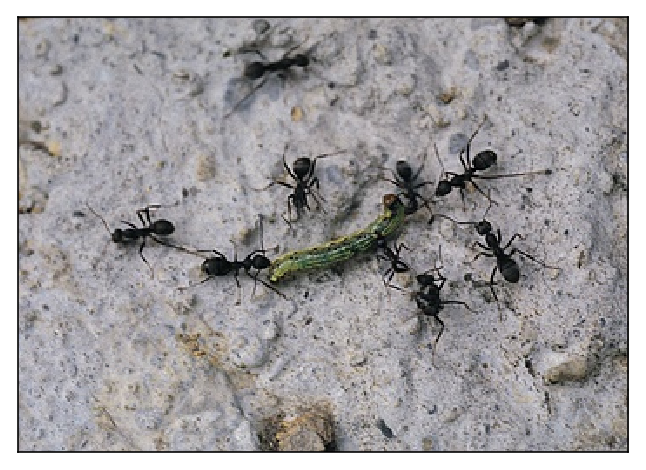

In [22]:
# This seems to be the Test Example where I want a prediction    
# Choose an image to pass through the model
#test_image = 'Downloads/hymenoptera_data/testdata_prediction/Ant-1818.jpg'
# Choose an image to pass through the model
test_image = 'hymenoptera_data/testdata_prediction/predA.jpg'
#test_image = 'hymenoptera_data/testdata_prediction/predC.jpg' # Predicted class is: fireboat
#test_image = 'images/dog.jpg'
# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
# Load the image
image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
image = data_transform(image).unsqueeze(0).cuda()

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
# Send the model to the GPU 
model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval();

In [23]:
# seems thats the latest when its necessary
# Prepare the labels
with open('hymenoptera_data/imagenet-simple-labels.json') as f:
#with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)


# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Predicted class is: ant


Predicted class is: bee


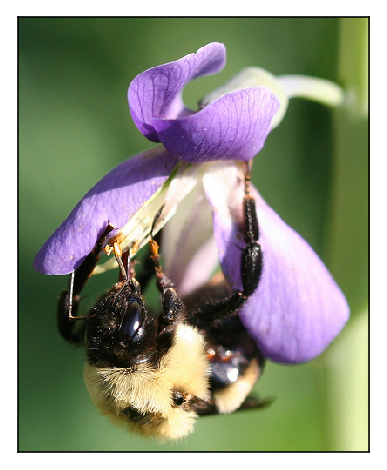

In [24]:
#2nd picture
test_image = 'hymenoptera_data/testdata_prediction/predB2.jpg'
data_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])
image = data_transform(image).unsqueeze(0).cuda()
model = models.resnet50(pretrained=True)
model.cuda()
model.eval();

with open('hymenoptera_data/imagenet-simple-labels.json') as f:
    labels = json.load(f)
out = model(image)
print("Predicted class is: {}".format(labels[out.argmax()]))

Predicted class is: jellyfish


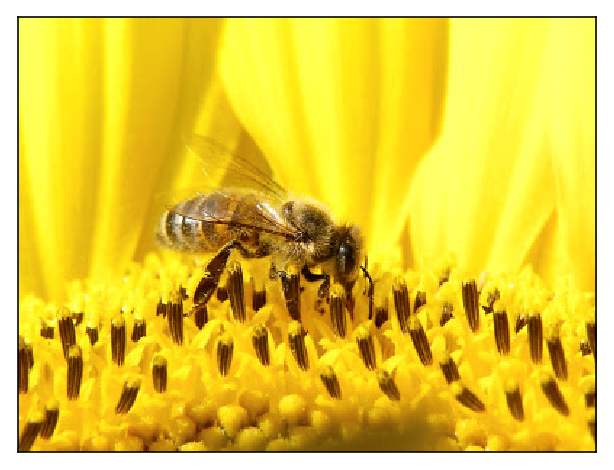

In [25]:
#2nd picture
test_image = 'hymenoptera_data/testdata_prediction/predB.jpg'
data_transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])
image = data_transform(image).unsqueeze(0).cuda()
model = models.resnet50(pretrained=True)
model.cuda()
model.eval();

with open('hymenoptera_data/imagenet-simple-labels.json') as f:
    labels = json.load(f)
out = model(image)
print("Predicted class is: {}".format(labels[out.argmax()]))

In [26]:
# seems to have no function
import time
fps = np.zeros(200)
with torch.no_grad(): # speed it up by not computing gradients since we don't need them for inference
    for i in range(200):
        t0 = time.time()
        out = model(image)
        fps[i] = 1 / (time.time() - t0)